In [6]:
import matplotlib.pyplot as plt
import networkx as nx
import hypernetx as hnx
import numpy as np
import matplotlib.pyplot as plt

In [7]:
scenes = {
    0: tuple('01234'),
    1: tuple('34567'),
    2: tuple('12589'),
    3: tuple('06789')
}

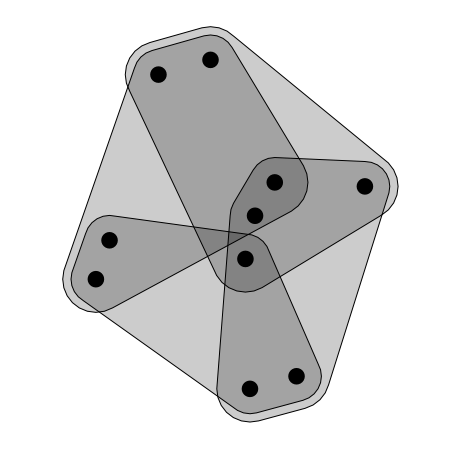

In [8]:
H = hnx.Hypergraph(scenes)

cmap = plt.cm.viridis
alpha = .2

sizes = np.array([len(e) for e in H.edges()])
norm = plt.Normalize(sizes.min(), sizes.max())

hnx.draw(H, with_edge_labels=False, with_node_labels=False, node_radius=2, edges_kwargs={
        'linewidths': 1,
        'edgecolors': 'black',
        'facecolors': cmap(norm(sizes))*(0, 0, 0, alpha)
    })

In [9]:
def I(x):
    return ( (1+x)*np.log(1+x)+(1-x)*np.log(1-x) )/2

def K(x):
    return 0.5 * x * np.log((1+x)/(1-x)) / I(x)

def L(x):
    return np.sqrt(2*I(x)/np.exp( K(x)*np.log(x) ))


In [10]:
t = np.linspace(0.0001,.99999,10000)
x = K(t)
y = L(t)
x[0] = 2
y[0] = 1
x[-1] = 9
y[-1] = np.sqrt(np.log(4))

xvals = np.linspace(0.001,.999,999)
pvals = np.linspace(2.81,9,1000)

Ixvals = I(xvals)

z = np.zeros(len(pvals))

for i in range(len(pvals)):
    p = pvals[i]
    z[i] = np.sqrt(min([(1 + xvals[j]**(-p))*Ixvals[j] for j in range(len(xvals))]))

In [19]:
plt.figure(figsize=(12, 4))
plt.plot( np.array([2,9]), np.sqrt(np.log(4))*np.ones(2), 'k:',linewidth=1, label=r'$\sqrt{2\log 2}$')
plt.plot(x, y, 'k', linewidth=1, label=r'$\beta_c(p)/\sqrt{p!}=\sqrt{p!}\min_{(0,1)}\sqrt{2x^{-p}\cdot I(x)}$') 
plt.plot(pvals[1:], z[1:], 'b-.', linewidth=1, label=r'$\beta_p(p)/\sqrt{p!}=\min_{(0,1)}\sqrt{(1+x^{-p})\cdot I(x)}$') 
plt.xlabel('p')
plt.ylabel(r'$\beta$')
pvals[0] = 2
z[0] = 1
plt.fill_between(pvals,z,np.sqrt(np.log(4))*np.ones(len(pvals)), color='orange', alpha=0.1)
plt.fill_between(x,y,np.sqrt(np.log(4))*np.ones(len(x)), color='grey', alpha=0.4)
plt.legend();